In [152]:
import numpy as np  
import pandas as pd
import random  
import string
import bs4 as bs  
import urllib.request  
import re
from collections import Counter

import tweepy
import TwitterCredentials as keys

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vpathalam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
auth = tweepy.OAuthHandler(keys.consumer_API_key, keys.consumer_API_secret_key)
auth.set_access_token(keys.access_token, keys.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

screen_name = "wsj"
alltweets = []  
new_tweets = api.user_timeline(screen_name = screen_name,count=200)
alltweets.extend(new_tweets)
oldest = alltweets[-1].id - 1

while len(new_tweets) > 0:
    print(f"getting tweets before {oldest}")        
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)  
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    print(f"...{len(alltweets)} tweets downloaded so far")

getting tweets before 1335577232463462401
...400 tweets downloaded so far
getting tweets before 1334709086714286080
...600 tweets downloaded so far
getting tweets before 1333916338818060287
...800 tweets downloaded so far
getting tweets before 1333104713445859332
...1000 tweets downloaded so far
getting tweets before 1332153440634593279
...1200 tweets downloaded so far
getting tweets before 1331356950978830338
...1400 tweets downloaded so far
getting tweets before 1330571822316859393
...1600 tweets downloaded so far
getting tweets before 1329726224264990727
...1800 tweets downloaded so far
getting tweets before 1328895761959047167
...2000 tweets downloaded so far
getting tweets before 1328141322369327104
...2200 tweets downloaded so far
getting tweets before 1327306932718284799
...2400 tweets downloaded so far
getting tweets before 1326520729991524351
...2600 tweets downloaded so far
getting tweets before 1325739962776621056
...2800 tweets downloaded so far
getting tweets before 132484

In [154]:
df = pd.DataFrame({"realDonaldTrump": alltweets})
df

,realDonaldTrump
0,Status(_api=<tweepy.api.API object at 0x7fabe1...
1,Status(_api=<tweepy.api.API object at 0x7fabe1...
2,Status(_api=<tweepy.api.API object at 0x7fabe1...
3,Status(_api=<tweepy.api.API object at 0x7fabe1...
4,Status(_api=<tweepy.api.API object at 0x7fabe1...
...,...
3217,Status(_api=<tweepy.api.API object at 0x7fabe1...
3218,Status(_api=<tweepy.api.API object at 0x7fabe1...
3219,Status(_api=<tweepy.api.API object at 0x7fabe1...
3220,Status(_api=<tweepy.api.API object at 0x7fabe1...


In [155]:
#function to convert the tweepy object to text
def totext(tweet):
    return tweet.text
#define new data frame to hold texts of tweets
dfnew = pd.DataFrame({"realDonaldTrump": []})
#map above function to each column in df
dfnew["realDonaldTrump"] = df["realDonaldTrump"].map(totext)
dfnew

,realDonaldTrump
0,Theater owners fear that releasing movies simu...
1,"Carrie Lam, Hong Kong’s chief executive, speak..."
2,The popularity of chess boomed because of the ...
3,China is pushing alternative theories about th...
4,"Darren Walker, the president of the Ford Found..."
...,...
3217,Some surveys got the results wrong in 2016—esp...
3218,The U.S. Air Force recently bought dozens of C...
3219,Some surveys got the results wrong in 2016—esp...
3220,At least one attacker killed three people and ...


In [156]:
complete = set()
all_topics = ["job", "economy", "trade", "market", "stock", "DJIA", "NASDAQ", "price", "jobs", "employed", "unemployed", "employment", "unemployment", "stock exchange", "bull", "bear", "market", "new york stock exchange", "shares", "financials", "taxes", "companies", "tax", "economic"]
for idx, row in dfnew.iterrows():
    corpus = nltk.sent_tokenize(row.values[0])
    for i in range(len(corpus)):
        corpus[i] = re.sub(r"https:\S+", "", corpus[i])
        corpus[i] = re.sub(r"From @\S+", "", corpus[i])
        corpus[i] = re.sub(r"@\S+", "", corpus[i])
        corpus[i] = re.sub(r"#\S+", "", corpus[i])
        corpus[i] = corpus[i].lower()
        corpus[i] = re.sub(r'\s+',' ',corpus[i])
        #corpus[i] = re.sub(r'\W',' ',corpus[i])
        corpus[i] = re.sub(r'\w*\d\w*', '', corpus[i]).strip()        
        for topic in all_topics:
            if topic in corpus[i]:
                complete.add(corpus[i])
print(len(complete))

357


In [136]:
wordfreq = {}
for sentence in complete:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [157]:
print(stopwords.words('english'))

for w in set(stopwords.words('english'))  :
    if str(w) in wordfreq:
        del wordfreq[str(w)]
#del wordfreq['trump']
#del wordfreq['wsj']
#del wordfreq['wsjwhatsnow']
len(wordfreq)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

1909

In [158]:
d = Counter(wordfreq)
newdict = {}
for k, v in d.most_common(20):
    print('%s: %i' % (k, v))
    newdict[k] = v

,: 234
’: 111
companies: 66
u.s.: 64
.: 56
market: 40
stocks: 35
economy: 30
economic: 29
stock: 26
new: 25
pandemic: 23
:: 23
biden: 22
trade: 20
jobs: 19
covid-: 19
joe: 18
china: 18
markets: 18


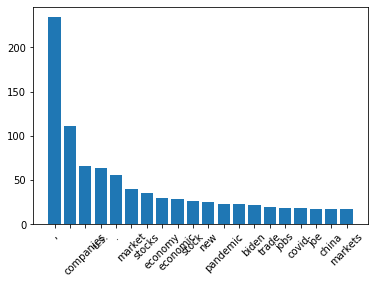

In [139]:
plt.bar(range(len(newdict)), list(newdict.values()), align='center')
plt.xticks(range(len(newdict)), list(newdict.keys()))
plt.xticks(rotation=45)
plt.show()
#plt.savefig('commonwords2.png')

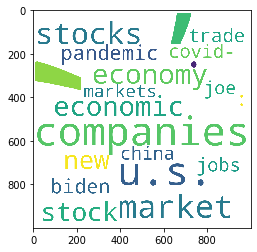

In [140]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordfreq)
plt.imshow(wc)
#plt.savefig('wordcloud.png')

In [161]:
import csv
import os
print(os.getcwd())
with open("./kaggle_data.csv", "r", encoding = "ISO-8859-1") as f:
    reader = csv.reader(f)
    i = next(reader)
    rest = list(reader)


/Users/vpathalam/Documents/Coding/election-analysis/tweet-stock-prediction


['target', 'ids', 'date', 'flag', 'user', 'text']

In [223]:
def tokenize(corpus):
    new_corpus = []
    for tweet in corpus:
        tweet = tweet.split( )
        for token in tweet:
            new_corpus.append(token)
    return new_corpus

data = pd.read_csv("kaggle_data.csv", encoding = "ISO-8859-1", engine='python')
target=data["target"].astype(float)
text=data["text"].values
new_re = re.compile("(%s|%s)" % (one, two))
text = [re.sub(new_re, "",item) for item in text[:1000]]

tfv=TfidfVectorizer(min_df=0, max_features=3000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w{3,}', ngram_range=(1,1),
                            use_idf=True,smooth_idf=True, sublinear_tf=True, stop_words = "english")
data=tfv.fit_transform(tokenize(text))
data=data.toarray()
#print (data.shape)

vocab = tfv.vocabulary_
vocab

{'awww': 183,
 'bummer': 344,
 'shoulda': 2065,
 'got': 1007,
 'david': 615,
 'carr': 398,
 'day': 617,
 'upset': 2495,
 'update': 2490,
 'facebook': 824,
 'texting': 2332,
 'result': 1938,
 'school': 2012,
 'today': 2369,
 'blah': 265,
 'dived': 680,
 'times': 2360,
 'ball': 197,
 'managed': 1431,
 'save': 1997,
 'rest': 1936,
 'bounds': 298,
 'body': 279,
 'feels': 861,
 'itchy': 1225,
 'like': 1347,
 'behaving': 231,
 'mad': 1416,
 'crew': 570,
 'need': 1579,
 'hug': 1151,
 'hey': 1099,
 'long': 1377,
 'time': 2358,
 'yes': 2675,
 'rains': 1869,
 'bit': 258,
 'lol': 1373,
 'fine': 877,
 'thanks': 2335,
 'nope': 1614,
 'didn': 651,
 'que': 1836,
 'muera': 1548,
 'spring': 2175,
 'break': 308,
 'plain': 1746,
 'city': 456,
 'snowing': 2123,
 'just': 1261,
 'pierced': 1734,
 'ears': 752,
 'couldn': 545,
 'bear': 221,
 'watch': 2570,
 'thought': 2349,
 'loss': 1390,
 'embarrassing': 774,
 'counts': 549,
 'idk': 1167,
 'did': 650,
 'talk': 2296,
 'anymore': 126,
 'gun': 1033,
 'really': 

In [225]:
complete = list(complete) 
arr = np.array(complete)
#print(arr.shape)
print(one)
print(two)

\b\w{1,2}\b
(@[A-Za-z0-9]+)|([^0-9A-Za-z 	])|(\w+:\/\/\S+)


In [126]:
trump_data = tfv.transform(arr)
trump_data = trump_data.toarray()
print(arr)
print (trump_data.shape)

['the companies say it’ll lead to job losses and…'
 'a sharp decline in job growth in november further prodded lawmakers to reach an agreement on coronavirus relief'
 '“there was a clear statement from u.s. voters four years ago that the gains from globalization and our economic sys…'
 'a rise in utility shares underscores how the recent gains in the sector are more than just a move to safety'
 'president-elect joe biden has sent signals that the u.s. will remain tough on china when it comes to trade.…'
 'lumber prices are making an unusual late-season climb, thanks in part to builder-friendly autumn weather'
 'former catchers hold about a third of mlb’s managing jobs.'
 'the leaders of microsoft, coca-cola, american airlines and other companies discuss how business is evolving during…'
 'the u.k. economy is on course to shrink again in the final quarter of the year as lockdowns take a toll'
 'millions of unemployed americans depend on benefits under two programs that will expire at th

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(data, np.array(target))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.